Synthetic sales data exported to 'synthetic_sales.csv'
Total Revenue: $2970492
Top Products by Revenue:
Product
Laptop        643257
Monitor       618627
Headphones    599315
Keyboard      575721
Phone         533572
Name: Revenue, dtype: int64


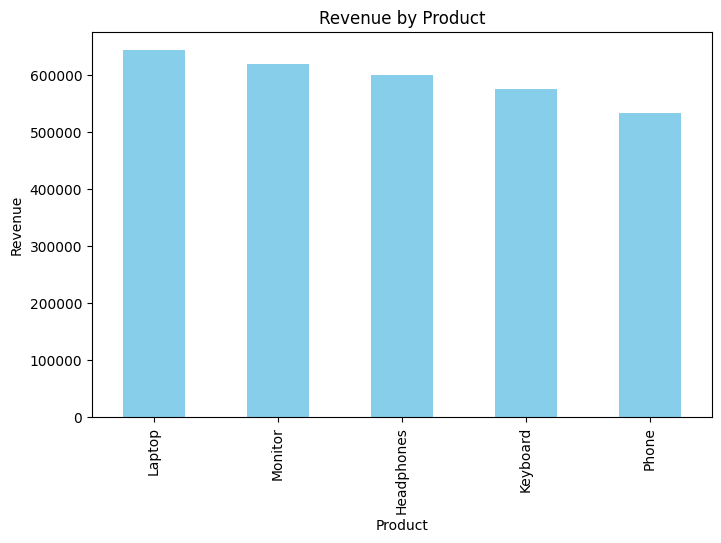

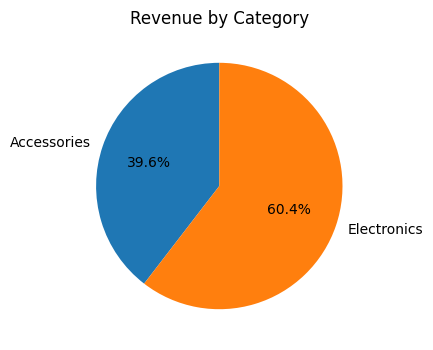

In [1]:

import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


products = ["Laptop", "Phone", "Headphones", "Monitor", "Keyboard"]
categories = ["Electronics", "Accessories"]
data = []
start_date = datetime(2025, 1, 1)

for i in range(500):
    product = random.choice(products)
    category = "Electronics" if product in ["Laptop","Phone","Monitor"] else "Accessories"
    price = random.randint(50, 2000)
    quantity = random.randint(1, 10)
    date = start_date + timedelta(days=random.randint(0, 240))
    data.append([date, product, category, price, quantity])

df = pd.DataFrame(data, columns=["Date", "Product", "Category", "Price", "Quantity"])
df.to_csv("synthetic_sales.csv", index=False)
print("Synthetic sales data exported to 'synthetic_sales.csv'")


df['Revenue'] = df['Price'] * df['Quantity']
total_revenue = df['Revenue'].sum()
top_products = df.groupby("Product")['Revenue'].sum().sort_values(ascending=False)
category_revenue = df.groupby("Category")['Revenue'].sum()

print(f"Total Revenue: ${total_revenue}")
print("Top Products by Revenue:")
print(top_products)


plt.figure(figsize=(8,5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize=(6,4))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Revenue by Category")
plt.ylabel("")
plt.show()
